In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sns.set_palette('husl',8)
%matplotlib inline

In [336]:
def summary_table(compared_part1_part3_normalized):
    count={}
    mini={}
    mean={}
    dict_90={}
    dict_95={}
    dict_97={}
    dict_98={}
    dict_99={}
    maxi={}
    for i in compared_part1_part3_normalized.columns:
        if i=='ServiceArea':
            continue
        count[i]=[str(compared_part1_part3_normalized[i].count())]
        count[i]=[str(compared_part1_part3_normalized[i].count())]
        mean[i]=[abs(compared_part1_part3_normalized[i]).mean().round(2)]
        maxi[i]=[abs(compared_part1_part3_normalized[i]).max().round(2)]
        dict_90[i]=[abs(compared_part1_part3_normalized[i]).quantile(0.25).round(2)]
        dict_95[i]=[abs(compared_part1_part3_normalized[i]).quantile(0.50).round(2)]
        dict_97[i]=[abs(compared_part1_part3_normalized[i]).quantile(0.75).round(2)]
        dict_98[i]=[abs(compared_part1_part3_normalized[i]).quantile(0.95).round(2)]
        dict_99[i]=[abs(compared_part1_part3_normalized[i]).quantile(0.99).round(2)]

    count=pd.DataFrame(count,index=['count'])
    mean=pd.DataFrame(mean,index=['mean'])
    q_90=pd.DataFrame(dict_90,index=['25%'])
    q_95=pd.DataFrame(dict_95,index=['50%'])
    q_97=pd.DataFrame(dict_97,index=['75%'])
    q_98=pd.DataFrame(dict_98,index=['95%'])
    q_99=pd.DataFrame(dict_98,index=['99%'])
    maxi=pd.DataFrame(maxi,index=['max'])

    compared_part1_part3_normalized_describe=pd.DataFrame()
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,count],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,mean],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,q_90],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,q_95],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,q_97],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,q_98],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,q_99],axis=0)
    compared_part1_part3_normalized_describe=pd.concat([compared_part1_part3_normalized_describe,maxi],axis=0)
    return compared_part1_part3_normalized_describe

In [353]:
cell_te=pd.read_csv('/Users/apple/Downloads/cell2cellholdout.csv')
cell_tr=pd.read_csv('/Users/apple/Downloads/cell2celltrain.csv')

In [277]:
ls=[]
for i in cell_tr.columns:
    print(i+':')
    print(cell_tr[i].dtype)
    if cell_tr[i].dtype==object:
        ls.append(i)

CustomerID:
int64
Churn:
object
MonthlyRevenue:
float64
MonthlyMinutes:
float64
TotalRecurringCharge:
float64
DirectorAssistedCalls:
float64
OverageMinutes:
float64
RoamingCalls:
float64
PercChangeMinutes:
float64
PercChangeRevenues:
float64
DroppedCalls:
float64
BlockedCalls:
float64
UnansweredCalls:
float64
CustomerCareCalls:
float64
ThreewayCalls:
float64
ReceivedCalls:
float64
OutboundCalls:
float64
InboundCalls:
float64
PeakCallsInOut:
float64
OffPeakCallsInOut:
float64
DroppedBlockedCalls:
float64
CallForwardingCalls:
float64
CallWaitingCalls:
float64
MonthsInService:
int64
UniqueSubs:
int64
ActiveSubs:
int64
ServiceArea:
object
Handsets:
float64
HandsetModels:
float64
CurrentEquipmentDays:
float64
AgeHH1:
float64
AgeHH2:
float64
ChildrenInHH:
object
HandsetRefurbished:
object
HandsetWebCapable:
object
TruckOwner:
object
RVOwner:
object
Homeownership:
object
BuysViaMailOrder:
object
RespondsToMailOffers:
object
OptOutMailings:
object
NonUSTravel:
object
OwnsComputer:
object
HasCr

## Purpose

1. How many of total revenue loss can be captured with our predicted highest risk group (Churn customer)


2. By customer segmentation, the telecommunications company can customize their marketing efforts for different cluster, and gain a deeper understanding of their customers' preferences in order to more accurately develope marketing materials.

## Variable explaination:

Customer demography: Age, Tenure, Gender, Location, Zip code, etc.

Bill and payment: Monthly fee, Billing amount, Count of overdue payment, payment method, Billing type, etc.

Network/TV/Phone usage records: Network use frequency, network flow, usage time and period, internet average speed, In-net call duration, Call type, etc.

Customer care/service: Service call number, service type, service duration, account change count


In [416]:
#numeric variables
cell_tr.iloc[:,2:].describe().round(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Town,Clerical,Crafts,Homemaker,Other Occupation,Professional,Retired,Self,Student,ServiceArea_level
count,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,...,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00,21489.00
mean,69.21,672.49,51.76,1.22,52.91,1.44,-9.67,-1.75,7.91,5.15,...,0.13,0.02,0.03,0.00,0.75,0.16,0.01,0.02,0.01,2.61
std,52.03,609.47,26.60,2.88,118.99,11.87,300.82,44.99,10.48,12.63,...,0.34,0.14,0.17,0.05,0.43,0.37,0.11,0.14,0.08,0.71
min,0.00,0.00,-6.00,0.00,0.00,0.00,-3875.00,-1107.70,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,37.73,244.00,34.00,0.00,0.00,0.00,-100.00,-10.30,1.70,0.30,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.00
50%,55.51,505.00,48.00,0.25,8.00,0.00,-4.00,-0.50,4.70,1.30,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3.00
75%,84.20,921.00,60.00,1.24,58.00,0.30,91.00,2.90,10.00,5.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3.00
max,1223.38,7359.00,400.00,159.39,4321.00,1112.40,4480.00,1724.40,221.70,324.70,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


In [269]:
#categorical variables
cell_tr[ls]

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
51043,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
51044,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No
51045,No,NEVPOW619,Yes,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,No


In [420]:
ls

['Churn',
 'ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

## Data preporcessing

In [278]:
#transfor 'yes'/'No', 'Known'/'Unknown' to 1/0; 
for i in ls:
    if 'Yes' in set(cell_tr[i]):
        cell_tr[i]=pd.Series(np.where(cell_tr[i].values == 'Yes', 1, 0),
          cell_tr.index)
    if 'Known' in set(cell_tr[i]) and 'Unknown' in set(cell_tr[i]):
        cell_tr[i]=pd.Series(np.where(cell_tr[i].values == 'Known', 1, 0),
          cell_tr.index)        

In [279]:
# HandsetPrice,'CreditRating','PrizmCode','Occupation'
cell_tr['HandsetPrice']=cell_tr['HandsetPrice'].replace("Unknown",np.nan)
cell_tr['PrizmCode']=cell_tr['PrizmCode'].replace("Other",'Other PrizmCode')
cell_tr['Occupation']=cell_tr['Occupation'].replace("Other",'Other Occupation')
cell_tr['CreditRating']=cell_tr['CreditRating'].str[0]

In [280]:
#transform categorical variables to dummy variables
for i in ['PrizmCode','Occupation']:
    dummy=pd.get_dummies(cell_tr[i])
    cell_tr=pd.concat([cell_tr,dummy],axis=1)
    cell_tr=cell_tr.drop(i,axis=1)   

In [282]:
area=pd.DataFrame(cell_tr['ServiceArea'].value_counts().reset_index())
area['%ServiceArea']=area['ServiceArea']/area['ServiceArea'].sum()
area['ServiceArea_level']=0
area=area.rename(columns={'ServiceArea':'frequency count','index':'ServiceArea'})

In [287]:
summary_table(area)

,frequency count,%ServiceArea,ServiceArea_level
count,747,747,747
mean,68.3,0,2.98
25%,4,0,3
50%,12,0,3
75%,61.5,0,3
95%,352.5,0.01,3
99%,352.5,0.01,3
max,1684,0.03,3


In [ ]:
area.loc[area['%ServiceArea'] >=0.02, 'ServiceArea_level'] =1
area.loc[area['%ServiceArea']<0.01, 'ServiceArea_level'] =3
area.loc[area['ServiceArea_level']==0, 'ServiceArea_level'] =2

In [284]:
area

,ServiceArea,frequency count,%ServiceArea,ServiceArea_level
0,NYCBRO917,1684,0.033005,1
1,HOUHOU281,1510,0.029594,1
2,DALDAL214,1498,0.029359,1
3,NYCMAN917,1182,0.023166,1
4,APCFCH703,783,0.015346,2
...,...,...,...,...
742,PITSOM814,1,0.000020,3
743,CHIDEK815,1,0.000020,3
744,BIRJAS205,1,0.000020,3
745,SHECAR717,1,0.000020,3


In [288]:
cell_tr=cell_tr.merge(area[['ServiceArea','ServiceArea_level']],how='left')

In [294]:
cell_tr=cell_tr.drop('ServiceArea',axis=1)

In [24]:
cell_tr.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [ ]:
cell_tr=cell_tr.dropna(axis=0,how='any')

cell_tr.to_csv('/Users/apple/Documents/Intern/cell_tr_clean.csv',index=False)

## Explore data analysis

In [345]:
cell_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21489 entries, 0 to 51043
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 21489 non-null  int64  
 1   Churn                      21489 non-null  int64  
 2   MonthlyRevenue             21489 non-null  float64
 3   MonthlyMinutes             21489 non-null  float64
 4   TotalRecurringCharge       21489 non-null  float64
 5   DirectorAssistedCalls      21489 non-null  float64
 6   OverageMinutes             21489 non-null  float64
 7   RoamingCalls               21489 non-null  float64
 8   PercChangeMinutes          21489 non-null  float64
 9   PercChangeRevenues         21489 non-null  float64
 10  DroppedCalls               21489 non-null  float64
 11  BlockedCalls               21489 non-null  float64
 12  UnansweredCalls            21489 non-null  float64
 13  CustomerCareCalls          21489 non-null  flo

Text(0.5, 1.0, 'Churn Distributions:\n 0 = No and 1 = Yes')

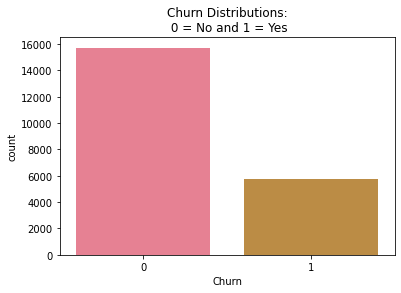

In [311]:
sns.countplot('Churn', data = cell_tr)
plt.title('Churn Distributions:\n 0 = No and 1 = Yes')

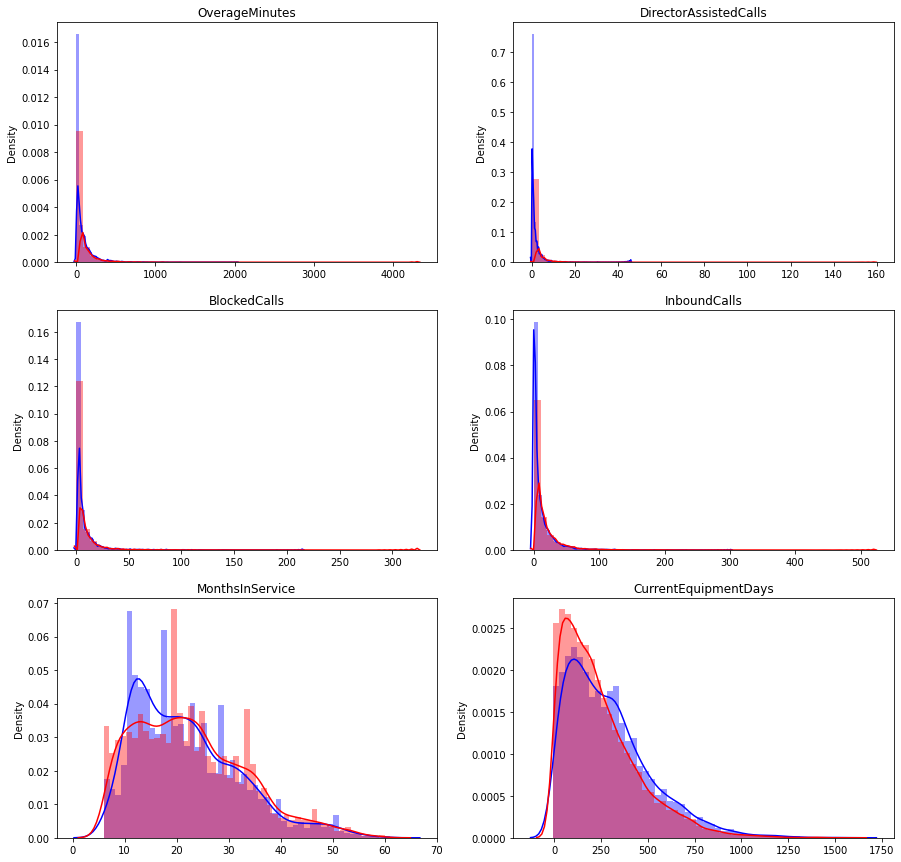

In [334]:
churn = (cell_tr.Churn == 1)
not_churn = (cell_tr.Churn == 0)
col=['OverageMinutes','DirectorAssistedCalls','BlockedCalls', 'InboundCalls','MonthsInService','CurrentEquipmentDays']

grid = gridspec.GridSpec(3, 2)
plt.figure(figsize=(15,15))

for n,col in enumerate(cell_tr[col]):
        ax = plt.subplot(grid[n])
        sns.distplot(cell_tr[col][churn], bins = 50, color='b',fit=None) 
        sns.distplot(cell_tr[col][not_churn], bins = 50, color='r',fit=None) 
        ax.set_ylabel('Density')
        ax.set_title(str(col))
        ax.set_xlabel('')
    
plt.show()

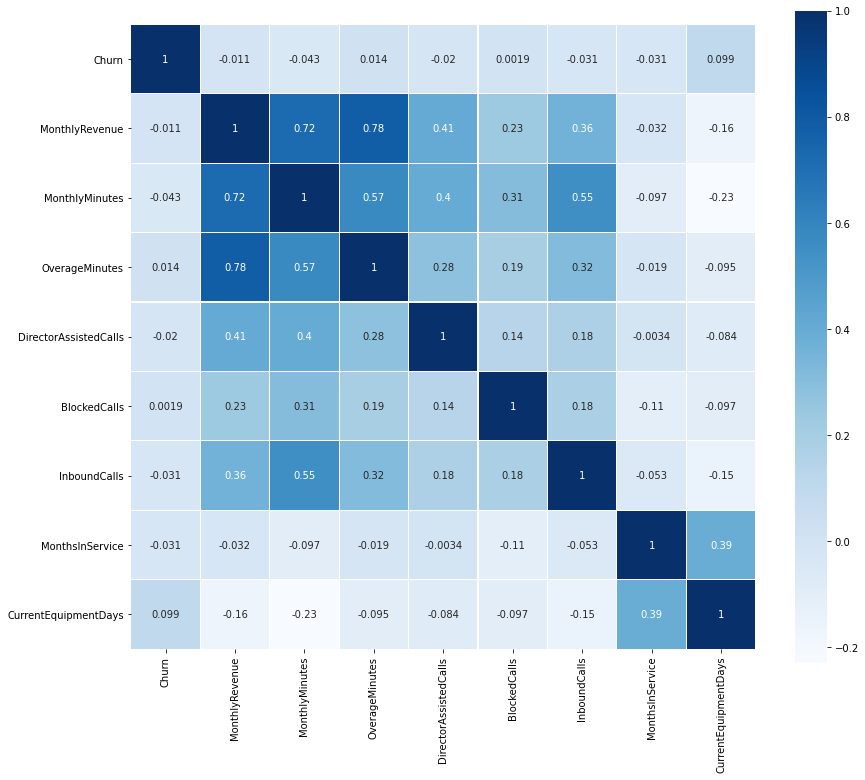

In [339]:
#correlation
plt.figure(figsize=(14,12))

sns.heatmap(cell_tr[['Churn','MonthlyRevenue', 'MonthlyMinutes','OverageMinutes','DirectorAssistedCalls','BlockedCalls', 'InboundCalls','MonthsInService','CurrentEquipmentDays']].corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = plt.cm.Blues, linecolor='white', annot=True)

plt.show()


In [445]:
cell_te=pd.read_csv('/Users/apple/Documents/Intern/cell_hold_clean.csv')
cell_tr=pd.read_csv('/Users/apple/Documents/Intern/cell_tr_clean.csv')
#cell_te=cell_te.dropna(axis=0,how='any')
cell_tr=cell_tr.dropna(axis=0,how='any')

## Re-sampling

undersampling and without re-balancing

In [393]:
#no sampling
#base line
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import log_loss,precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score,roc_auc_score,confusion_matrix,roc_curve,classification_report

X=cell_tr.drop(['CustomerID','Churn'],axis=1)
y=cell_tr['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

In [362]:
%%time
lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42)

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_val)
y_score = lgbm_clf.predict_proba(X_val)[:,1]

CPU times: user 2.94 s, sys: 125 ms, total: 3.07 s
Wall time: 405 ms


baseline Lightgbm logloss:0.542382
baseline Lightgbm roc score :0.653040


,Predicted Negative,Predicted Positive
Actual Negative,7674,304
Actual Positive,2419,348


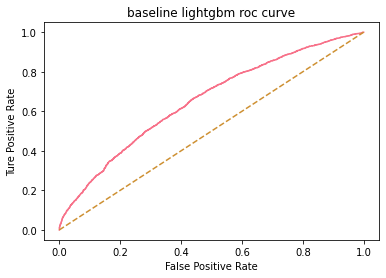

In [367]:
#accuracy score
acc_nn = accuracy_score(y_val, y_pred)
#logloss
logloss_nn=log_loss(y_val,y_score)
print('baseline Lightgbm logloss:%f'%logloss_nn)
#roc
roc_nn=roc_auc_score(y_val,y_score)
print('baseline Lightgbm roc score :%f'%roc_nn)
#roc curve
fpr_nn,tpr_nn,_=roc_curve(y_val,y_score)
plt.plot(fpr_nn,tpr_nn)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('baseline lightgbm roc curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
#confusion matric
display((pd.DataFrame(confusion_matrix(y_val, y_pred),columns=['Predicted Negative','Predicted Positive'],index=['Actual Negative','Actual Positive']))
)

In [358]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# under sampling

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))
#majority class is undersampled to have the same number of examples as the minority class.

Counter({0: 5760, 1: 5760})


In [379]:
from numpy import mean
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define pipeline
steps = [('under', RandomUnderSampler()), ('model', lgbm.LGBMClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
neg_log_loss = cross_val_score(pipeline, X, y, scoring='neg_log_loss', cv=cv, n_jobs=-1)
neg_log_loss = mean(neg_log_loss)
print('neg_log_loss: %.3f' % neg_log_loss)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('Roc_auc: %.3f' % score)

neg_log_loss: -0.655
Roc_auc: 0.657


## Modeling

1. customer churn classification model(Yes--high risk customer)

XGBoost

Evaluation was performed using the Area under receiver operating characteristic curve “AUC” 


2. further build Customer Segmentation model

Use KMeans to build a Customer Segmentation model, and then the different distributions of each cluster.

Customer segmentation: dividing customers into groups of individuals that are similar in specific ways relevant to marketing, such as age, months in service, services usage and services spending.


In [394]:
#model1 hyperplane tuning

# Hyperplane Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

random_state=42
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}#number of combinations

clf = lgbm.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,#This parameter defines the number of HP points to be tested
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training until validation scores don't improve for 30 rounds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[100]	valid's auc: 0.658298
[200]	valid's auc: 0.661249
Early stopping, best iteration is:
[179]	valid's auc: 0.661487
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.653767
Early stopping, best iteration is:
[119]	valid's auc: 0.654695
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654576
Early stopping, best iteration is:
[127]	valid's auc: 0.655513
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.659725
Early stopping, best iteration is:
[86]	valid's auc: 0.660225
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.652393
Early stopping, best iteration is:
[88]	valid's auc: 0.653168
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.656307
[200]	valid's auc: 0.659686
Early stopping, best iteration is:
[199]	valid's auc: 0.659801
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655281
Early 

[100]	valid's auc: 0.653719
Early stopping, best iteration is:
[80]	valid's auc: 0.654034
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.652304
Early stopping, best iteration is:
[73]	valid's auc: 0.653973
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.656131
Early stopping, best iteration is:
[81]	valid's auc: 0.657841
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.652733
Early stopping, best iteration is:
[71]	valid's auc: 0.655724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid'

[100]	valid's auc: 0.6544
Early stopping, best iteration is:
[79]	valid's auc: 0.655328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	valid's auc: 0.654425
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.65909
Early stopping, best iteration is:
[70]	valid's auc: 0.661048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[56]	valid's auc: 0.65652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve fo

Early stopping, best iteration is:
[60]	valid's auc: 0.663358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	valid's auc: 0.657655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	valid's auc: 0.656502
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[68]	valid's auc: 0.659994
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[52]	valid's auc: 0.654381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:

Early stopping, best iteration is:
[137]	valid's auc: 0.66038
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.653476
Early stopping, best iteration is:
[110]	valid's auc: 0.654333
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best it

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654855
Early stopping, best iteration is:
[100]	valid's auc: 0.654855
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.658006
[200]	valid's auc: 0.661869
Early stopping, best iteration is:
[218]	valid's auc: 0.662162
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654679
[200]	valid's auc: 0.655623
Early stopping, best iteration is:
[177]	valid's auc: 0.656339
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655389
Early stopping, best iteration is:
[142]	valid's auc: 0.655745
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655708
Early stopping, best iteration is:
[131]	valid's auc: 0.656755
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654213
Early stopping, best iteration is:
[120]	valid's auc: 0.655367
Training until validation scores

[100]	valid's auc: 0.640582
Early stopping, best iteration is:
[84]	valid's auc: 0.640582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration

Early stopping, best iteration is:
[75]	valid's auc: 0.652521
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.650827
Early stopping, best iteration is:
[78]	valid's auc: 0.651374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	valid's auc: 0.630697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[69]	valid's auc: 0.634753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[66]	valid's auc: 0.635098
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.634627
Early stopping, best iteration is:
[73]	valid's auc: 0.634627
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.638086
Early stopping, best iteration is:
[79]	valid's auc: 0.638116
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.660067
Early stopping, best iterat

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.661696
Early stopping, best iteration is:
[76]	valid's auc: 0.663603
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654512
Early stopping, best iteration is:
[73]	valid's auc: 0.656433
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.658038
Early stopping, best iteration is:
[77]	valid's auc: 0.658751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[63]	valid's auc: 0.658987
Training until validation scores don't improve for 30 rounds
Early stoppi

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.6min finished


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.659955
Early stopping, best iteration is:
[76]	valid's auc: 0.660405
Best score reached: 0.6558531127861512 with params: {'colsample_bytree': 0.7076074093370144, 'min_child_samples': 105, 'min_child_weight': 1e-05, 'num_leaves': 26, 'reg_alpha': 5, 'reg_lambda': 5, 'subsample': 0.7468773130235173} 


In [391]:
#further tuning 'scale_pos_weight' for inbalanced data
opt_parameters = {'colsample_bytree': 0.7076, 'min_child_samples': 105, 'min_child_weight':1e-05, 'num_leaves': 26, 
                  'reg_alpha':5, 'reg_lambda': 5, 'subsample': 0.7468}

clf_sw = lgbm.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[0.1,0.2,0.3,0.4,0.5,1,2,6,12,15,18,20,50,80,100,300,500,1000]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.661858


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Early stopping, best iteration is:
[116]	valid's auc: 0.662882
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655613
Early stopping, best iteration is:
[109]	valid's auc: 0.656502
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655523
Early stopping, best iteration is:
[118]	valid's auc: 0.656506
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.654749
Early stopping, best iteration is:
[112]	valid's auc: 0.655862
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.658049
Early stopping, best iteration is:
[118]	valid's auc: 0.659239
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.66456
Early stopping, best iteration is:
[132]	valid's auc: 0.665417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.511795
Training until validation scores don't improve for 30 ro

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Ear

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   15.4s finished


[100]	valid's auc: 0.659955
Early stopping, best iteration is:
[76]	valid's auc: 0.660405
Best score reached: 0.6558531127861512 with params: {'scale_pos_weight': 1} 


In [404]:
#lightgbm model1.2 hyperplane tuning with under sampling data
X_train, X_val, y_train, y_val = train_test_split(X_under, y_under, test_size=0.5, random_state=0)

random_state=42
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}#number of combinations

clf = lgbm.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,#This parameter defines the number of HP points to be tested
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648066
Early stopping, best iteration is:
[119]	valid's auc: 0.649352


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[68]	valid's auc: 0.654651
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.650252
Early stopping, best iteration is:
[131]	valid's auc: 0.65169
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648677
Early stopping, best iteration is:
[151]	valid's auc: 0.649063
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.643394
Early stopping, best iteration is:
[105]	valid's auc: 0.643839
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648859
Early stopping, best iteration is:
[169]	valid's auc: 0.651099
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.655187
Early stopping, best iteration is:
[118]	valid's auc: 0.655894
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.652575
Early stopping, best iteratio

Early stopping, best iteration is:
[59]	valid's auc: 0.650937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid's auc: 0.647253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[56]	valid's auc: 0.641274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's

Early stopping, best iteration is:
[69]	valid's auc: 0.651087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid's auc: 0.652561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	valid's auc: 0.657601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[42]	valid'

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.64415
Early stopping, best iteration is:
[157]	valid's auc: 0.646212
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.649223
Early stopping, best iteration is:
[151]	valid's auc: 0.650424
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648287
Early stopping, best iteration is:
[121]	valid's auc: 0.648573
Training until validation scores don't improve for 30 rounds
[100]	valid's au

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.64417
Early stopping, best iteration is:
[122]	valid's auc: 0.645376
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[43]	valid's auc: 0.649121
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.649637
Early stopping, best iteration is:
[86]	valid's auc: 0.649698
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648689
Early stopping, best iteration is:
[82]	valid's auc: 0.649219
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.641856
Early stopping, best iteration is:
[83]	valid's auc: 0.643327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[47]	valid's auc: 0.610517
Training until validation scores 

Early stopping, best iteration is:
[67]	valid's auc: 0.65044
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.643799
Early stopping, best iteration is:
[94]	valid's auc: 0.64483
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.645159
Early stopping, best iteration is:
[99]	valid's auc: 0.645168
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid's auc: 0.64886
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.650208
Early stopping, best iteration is:
[136]	valid's auc: 0.651038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	valid's auc: 0.644892
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.642304
Early stopping, best iteration is:
[130]	valid's auc: 0.643722
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.645773


[100]	valid's auc: 0.652353
Early stopping, best iteration is:
[85]	valid's auc: 0.65343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.659041
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.658306
Early stopping, best iteration is:
[125]	valid's auc: 0.65878
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.65256
Early stopping, best iteration is:
[76]	valid's auc: 0.654601
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.651514
Early stopping, best iteration is:
[113]	valid's auc: 0.652299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	v

[100]	valid's auc: 0.647537
Early stopping, best iteration is:
[74]	valid's auc: 0.648652
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.647532
Early stopping, best iteration is:
[89]	valid's auc: 0.649047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[34]	valid's auc: 0.657289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[61]	valid's auc: 0.656539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	valid's auc: 0.65314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	valid's auc: 0.649252
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.642839
Early stopping, best iteration is:
[95]	valid's auc: 0.643418
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.648983
Early stopping, best iterati

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.627358
Early stopping, best iteration is:
[72]	valid's auc: 0.628712
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.647231
Early stopping, best iteration is:
[109]	valid's auc: 0.647642
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.653015
Early stopping, best iteration is:
[96]	valid's auc: 0.653184
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.650043
Early stopping, best iteration is:
[143]	valid's auc: 0.651384
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.649002
Early stopping, best iteration is:
[70]	valid's auc: 0.649052
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.641111
Early stopping, best iteration is:
[70]	valid's auc: 0.643412
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.661657
Ear

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   47.9s finished


In [406]:
gs.best_params_

{'colsample_bytree': 0.6879091728281055,
 'min_child_samples': 163,
 'min_child_weight': 10.0,
 'num_leaves': 10,
 'reg_alpha': 1,
 'reg_lambda': 0.1,
 'subsample': 0.6775057521029393}

In [407]:
opt_parameters
#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**gs.best_estimator_.get_params())

#Train the final model with learning rate decay
clf_final.fit(X_under, y_under, **fit_params)


Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.661657
Early stopping, best iteration is:
[79]	valid's auc: 0.662919


LGBMClassifier(colsample_bytree=0.6879091728281055, metric='None',
               min_child_samples=163, min_child_weight=10.0, n_estimators=5000,
               n_jobs=4, num_leaves=10, random_state=314, reg_alpha=1,
               reg_lambda=0.1, subsample=0.6775057521029393)

In [447]:
X_te=cell_te.drop(['CustomerID','Churn'],axis=1)
X_te=X_te.dropna(axis=0,how='any')
y_te_pred=clf_final.predict(X_te)

In [451]:
label=pd.DataFrame(y_te_pred).rename(columns={0:'Pred_Churn'})

In [462]:
pred_df=pd.concat([label,X_te.reset_index().drop('index',axis=1)],axis=1)
pred_df['revenue_loss']=pred_df.Pred_Churn*pred_df.MonthlyRevenue

In [463]:
pred_df['revenue_loss'].sum()

254805.22

In [ ]:
clf_final.fit(X_train, y_train, **fit_params)

In [401]:
cell_tr.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'Ow

Text(0.5, 0, 'Feature Importance')

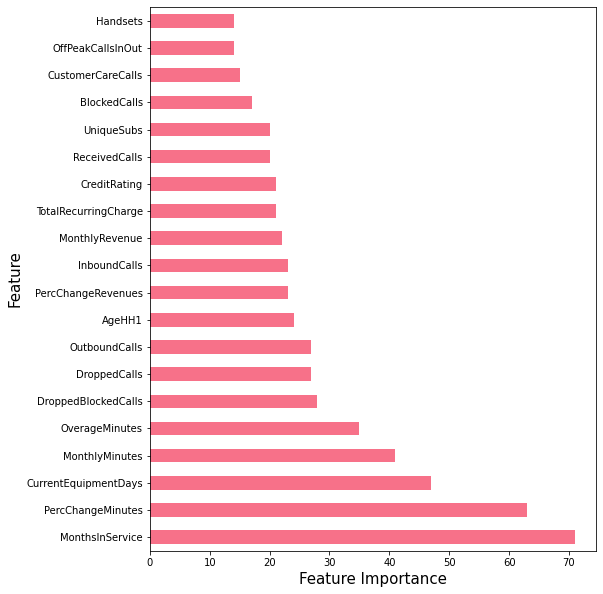

In [408]:
feat_imp = pd.Series(clf_final.feature_importances_, index=cell_tr.drop(['Churn','CustomerID'], axis=1).columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))
plt.ylabel("Feature", fontsize=15)
plt.xlabel("Feature Importance", fontsize=15)


Kmeans

In [427]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [428]:
cell_tr.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'Ow

In [464]:
# Scaling non-dummy data
numerical_x = cell_tr[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'MaritalStatus',
       'Other PrizmCode', 'Rural', 'Suburban', 'Town', 'Clerical', 'Crafts',
       'Homemaker', 'Other Occupation', 'Professional', 'Retired', 'Self',
       'Student', 'ServiceArea_level']]
numerical_x = scale(numerical_x.values)

dummy_x = cell_tr.drop(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'MaritalStatus',
       'Other PrizmCode', 'Rural', 'Suburban', 'Town', 'Clerical', 'Crafts',
       'Homemaker', 'Other Occupation', 'Professional', 'Retired', 'Self',
       'Student', 'ServiceArea_level'], axis = 1).values

scale_x = np.concatenate((numerical_x,dummy_x), axis = 1)


In [465]:
# Find best number of clusters for Kmeans
KS = [3,4,5]
scores = []
freq_tables = []
labels = []
for k in KS:
    lbls = KMeans(n_clusters = k, max_iter = 300, tol = 0.0001).fit_predict(scale_x)
    scores.append(silhouette_score(scale_x, lbls, metric='euclidean'))
    freq_tables.append(pd.crosstab(pd.Index(lbls).sort_values(), columns='count'))
    labels.append(lbls)
pois = cell_tr.columns

# get best k
max_score = max(scores)
best_i = scores.index(max_score)
best_k = KS[best_i]

In [466]:
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(scale_x)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [480]:
kmeans.transform(scale_x)

array([[333446.42728882,  53934.2192039 , 181450.5619473 ],
       [333438.42733302,  53926.21940661, 181442.56202364],
       [333426.42746418,  53914.22040748, 181430.56228243],
       ...,
       [ 66429.57359315, 345941.78161095, 218425.43851626],
       [ 66497.57310644, 346009.78152004, 218493.43836915],
       [ 66525.57324343, 346037.78154791, 218521.43841436]])

In [470]:
cluster=pd.DataFrame(kmeans.labels_).rename(columns={0:'cluster'})

In [474]:
set(cluster.cluster)

{0, 1, 2}

In [477]:
clust_df=pd.concat([cluster,cell_tr],axis=1)

In [478]:
clust_df1=clust_df[clust_df['cluster']==0]
clust_df2=clust_df[clust_df['cluster']==1]
clust_df3=clust_df[clust_df['cluster']==2]

In [ ]:
#split X, Y
X_df_c1,Y_df_c1=data_process(clust_df1)
X_df_c2,Y_df_c2=data_process(clust_df2)
X_df_c3,Y_df_c3=data_process(clust_df3)

In [479]:
clust_df1

,cluster,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,Town,Clerical,Crafts,Homemaker,Other Occupation,Professional,Retired,Self,Student,ServiceArea_level
16273,0,3257454,1,5.00,0.0,5.0,0.00,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,3.0
16274,0,3257506,0,56.95,272.0,40.0,0.25,51.0,0.0,-162.0,...,1,0,0,0,1,0,0,0,0,3.0
16275,0,3257554,0,30.24,96.0,30.0,0.25,0.0,0.0,29.0,...,1,0,0,0,0,1,0,0,0,3.0
16276,0,3257566,0,94.90,588.0,75.0,1.73,46.0,1.6,333.0,...,1,0,0,0,1,0,0,0,0,3.0
16277,0,3257706,0,43.19,341.0,45.0,0.74,21.0,0.0,-17.0,...,0,0,0,0,1,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21484,0,3399870,0,71.16,586.0,45.0,0.99,100.0,0.0,92.0,...,0,0,0,0,1,0,0,0,0,3.0
21485,0,3399874,1,33.63,28.0,30.0,0.00,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,3.0
21486,0,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,...,1,0,0,0,1,0,0,0,0,3.0
21487,0,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,3.0


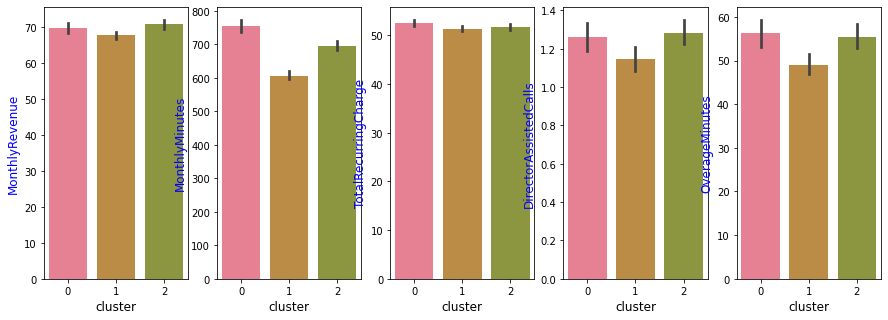

In [494]:
temp_list = ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

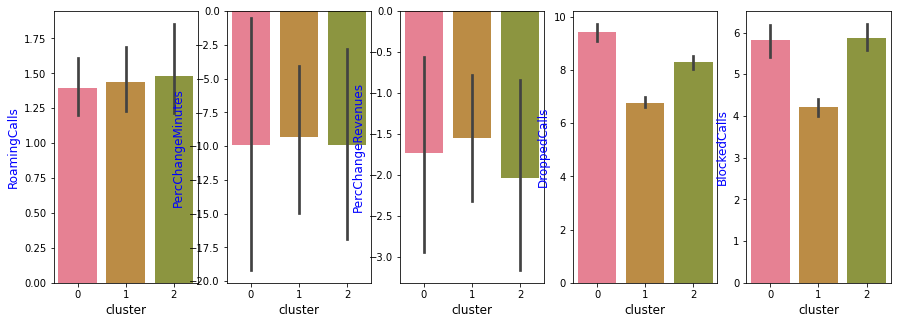

In [495]:
temp_list = ['RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

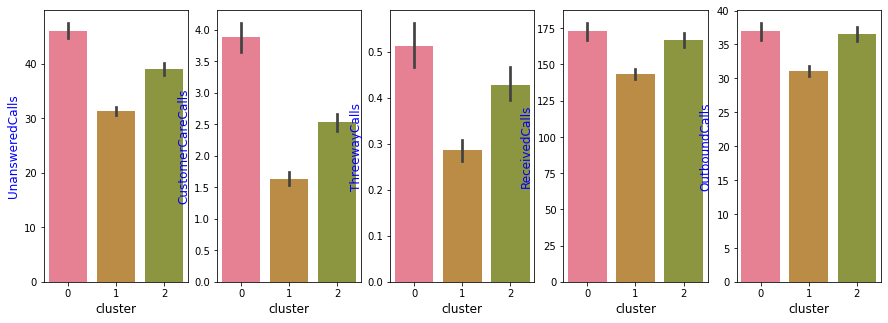

In [496]:
temp_list = ['UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

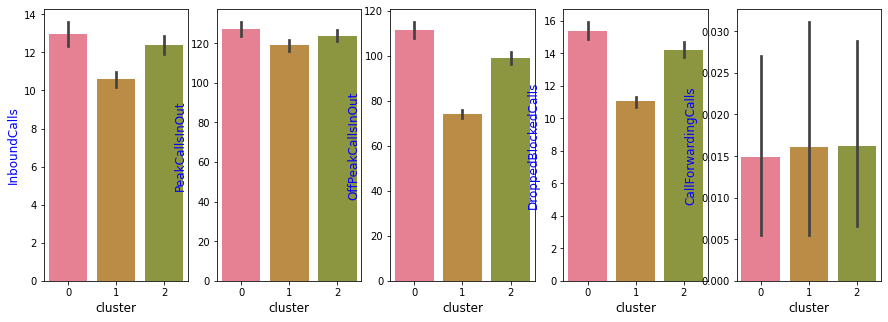

In [497]:
temp_list = ['InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

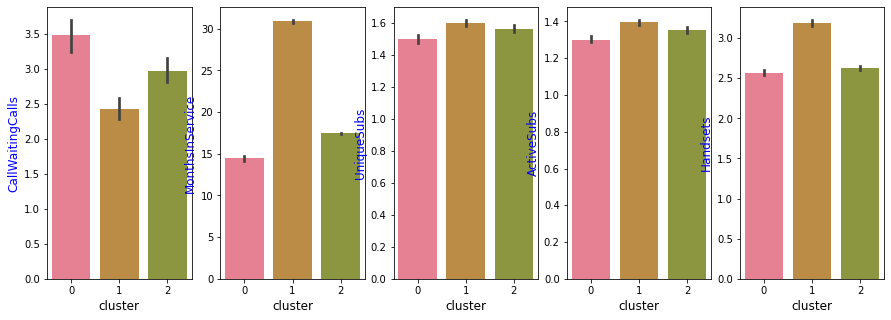

In [498]:
temp_list = ['CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

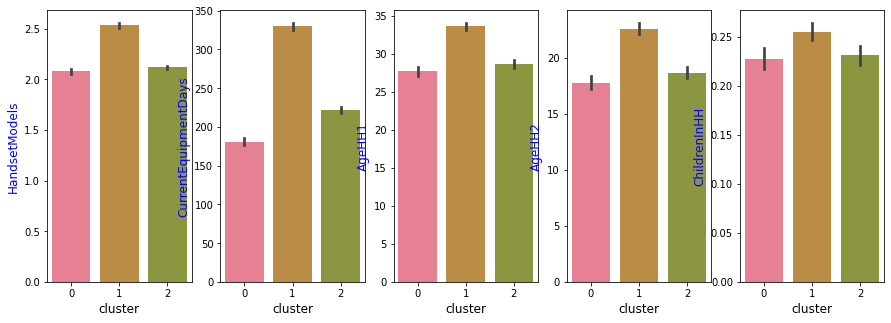

In [499]:
temp_list = ['HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

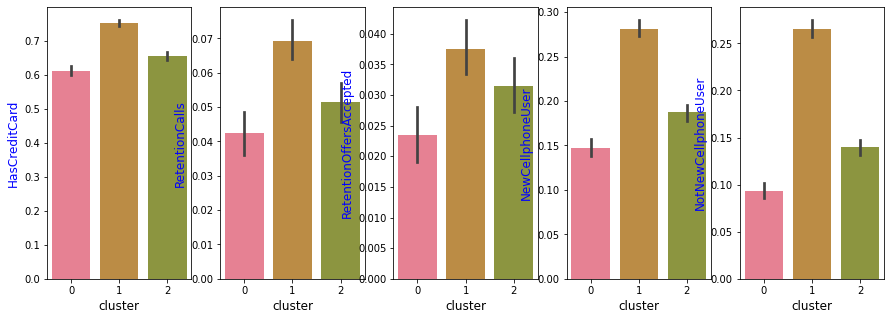

In [504]:
temp_list = ['HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15, 5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_ylabel(temp_list[i], fontsize=12, color="blue")

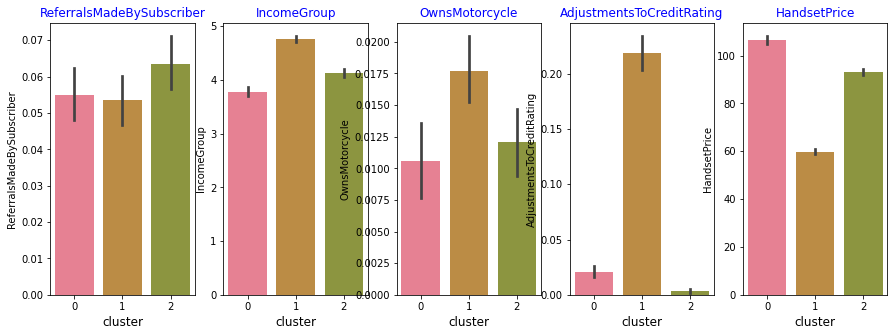

In [525]:
temp_list = ['ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15,5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_title(temp_list[i], fontsize=12, color="blue")

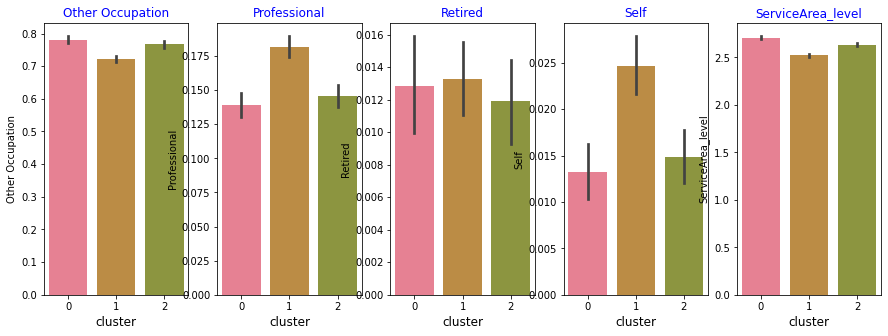

In [530]:
temp_list = ['Other Occupation', 'Professional', 'Retired', 'Self',
       'ServiceArea_level']
temp_list.append("cluster")
temp = clust_df.loc[:, temp_list]

fig, axs = plt.subplots(figsize=(15,5), ncols=len(temp_list) - 1)

for i in range(len(temp_list) - 1):
    ax = sns.barplot(x="cluster", y=temp_list[i], data=temp, ax=axs[i])
    ax.set_xlabel("cluster", fontsize=12)
    ax.set_title(temp_list[i], fontsize=12, color="blue")